## Image Classification with MNIST Dataset

The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits from 0 to 9.

First, we need to understand the dataset, and visualize our training/validation data.

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [3]:
x_train.shape # 60000 images, each with dimensions 28x28

(60000, 28, 28)

In [4]:
x_valid.shape

(10000, 28, 28)

In [5]:
x_train.dtype # 8-bit integer values

dtype('uint8')

In [6]:
print(x_train.min(), x_train.max()) # 0 is black, 255 is white

0 255


In [7]:
x_train[0] # visualize the first image in the training dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

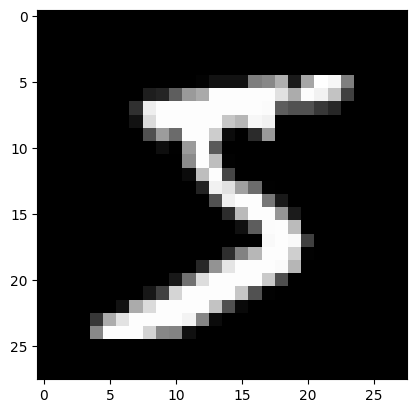

In [8]:
# render the first grayscale image in x_train for visualization
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

Is this a 3 or a 5? We can find that answer in y_train.

In [9]:
y_train[0]

5

## Preparing the Data for Training:

1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label easier to work with for the model

In [10]:
x_train = x_train.reshape(60000, 784) # Flatten the image data
x_valid = x_valid.reshape(10000, 784)

In [11]:
x_train.shape # observe the shape is now 60000 x 784 (28 * 28 = 784)

(60000, 784)

In [12]:
x_train[0] # visualize the first image array

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [13]:
x_train = x_train / 255 # Normalize the image data
x_valid = x_valid / 255

In [14]:
x_train.dtype # 8-bit integer -> 64-bit float

dtype('float64')

In [15]:
print(x_train.min(), x_train.max()) # new normalized values

0.0 1.0


### Categorical Encoding the Labels

This is necessary to avoid unwanted biases when training the model.

What biases? 
Assume the model was trying to read a 4, but guessed a 5. Numerically, isn't guessing a 5 better than guessing a 6 or 2?
In perspective of the problem, no. We're reading images, not doing calculations - error based on calculations is irrelevant.
The only correct answer to an image that reads 4 is 4. So we transform the label from 4 to an array of True and False.

    E.g. 4 --> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

We read the example array as, [Is it a 1?, is it a 2?, is it a 3?, ...]
This way we ensure that the model does not pick up any unwanted biases.

In [16]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [17]:
y_train[0] # the 5 is now categorically encoded

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Creating the Model

The data is now prepared for training, and we can build a simple classification model using Keras's Sequential model class.
The model will comprise of 3 main parts:

1. The input layer
2. Several hidden layers
3. An output layer

The layers will be densely connected - meaning that each neuron in the layer (and its weights) will affect every neuron in the next layer.

Note that the input layer accepts a 1D array of 784 values.

The output layer uses a softmax activation function, which results in each output value having a probability from 0 to 1, and the summation of all the outputs being 1. There will be 10 outputs since the network is to make a guess about each image belonging to 1 of 10 possible categories (categorical encoding).

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

/Users/sundar/Desktop/jupyter_practice/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Note the number of trainable parameters. Each of these can be adjusted during training and will contribute towards the trained model's guesses.

## Compiling and Training the Model

We will use the categorical crossentropy loss function, and track the accuracy of the model as it trains.

The model will train through 5 iterations of training dataset (5 epochs).

In [20]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9025 - loss: 0.3129 - val_accuracy: 0.9665 - val_loss: 0.1064
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9746 - loss: 0.0874 - val_accuracy: 0.9752 - val_loss: 0.0842
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0563 - val_accuracy: 0.9768 - val_loss: 0.0913
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0432 - val_accuracy: 0.9776 - val_loss: 0.0904
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0348 - val_accuracy: 0.9807 - val_loss: 0.0902


### Analyzing Accuracy

Observe the accuracy and val_accuracy scores. Accuracy states how well the model did for the epoch on all the training data. Val_accuracy states how well the model did on the validation data, which was not used at all for training the model. 

As you can see, this model did well (val_accuracy > 0.95).

The next step would be to use this model to classify new, unseen handwritten images, which is called inference.

In [22]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}